In [1]:
import fortranT
fortranT.init_keras()
itile=9
itime=2
fname='tile_%2.2i/output%3.3i.bin'%(itile+1,itime+1)
dims=open('tile_%2.2i/output%3.3i'%(itile+1,itime+1),'r').readline().split()
nx=int(dims[0])
ny=int(dims[1])
nz=72
print(fname,nx,ny,nz)
fields_test=fortranT.read_data(fname, nx,ny)
#varList=['qv','qc','qr','qi','qs','qg','th','qv_new','qc_new','qr_new','qi_new',\
#         'qs_new','qg_new','th_new','press','dz']
qvT=fields_test[0,:,:,:]
qcT=fields_test[1,:,:,:]
qrT=fields_test[2,:,:,:]
qiT=fields_test[3,:,:,:]
qsT=fields_test[4,:,:,:]
qgT=fields_test[5,:,:,:]
thT=fields_test[6,:,:,:]
qv_newT=fields_test[7,:,:,:]
qc_newT=fields_test[8,:,:,:]
qr_newT=fields_test[9,:,:,:]
qi_newT=fields_test[10,:,:,:]
qs_newT=fields_test[11,:,:,:]
qg_newT=fields_test[12,:,:,:]
th_newT=fields_test[13,:,:,:]
pressT=fields_test[14,:,:,:]
dzT=fields_test[15,:,:,:]

qv_new,qc_new,qr_new,qi_new,qs_new,qg_new,th_new = fortranT.updatefields(qvT,qcT,qrT,qiT,qsT,qgT,thT,pressT,dzT,nx,ny,nz)

 init keras
  -7.85058364E-02  0.133244187      -5.23495907E-03  -9.83665325E-03   3.67776491E-02  -3.90244764E-03   4.93611470E-02
tile_10/output003.bin 199 17 72
 tile_10/output003.bin
         199          17          72


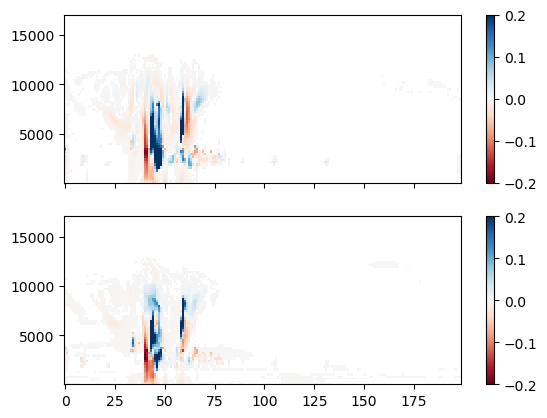

In [23]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure()
h=dzT.cumsum(axis=1)
ax1=plt.subplot(211)
diff=th_newT[:,:,10]-thT[:,:,10]
diffm=np.ma.array(diff,mask=abs(diff)<1e-3)
plt.pcolormesh(range(nx),h[0,:,0],(diffm).T,cmap='RdBu',vmin=-0.2,vmax=0.2)
ax1.xaxis.set_ticklabels([])
plt.title('Physical Model')
plt.colorbar()
plt.subplot(212)
diffp=(th_new[:,:,10]-thT[:,:,10])
diffpm=np.ma.array(diffp,mask=abs(diffp)<1e-3)
plt.pcolormesh(range(nx),h[0,:,0],diffpm.T,cmap='RdBu',vmin=-0.2,vmax=0.2)
plt.title('Emulator')
plt.suptitle('$\delta$Temperature')
plt.colorbar()

In [18]:
h=dzT.cumsum(axis=1)
print(h.shape)

(199, 72, 17)


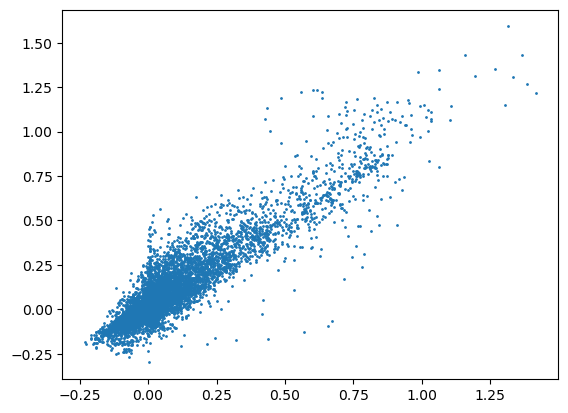

In [6]:
plt.scatter((th_new-thT).flatten(),(fields_test[13,:,:,:]-fields_test[6,:,:,:]).flatten(),s=1)